In [20]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

n = 10
v = 1.5

# 线性带的计算，从fsolver.ipynb复制过来，作为非线性布洛赫波的参数mu和牛顿迭代法初始值

def eig_res_sorted():
    data_zip = zip(data[0], data[1])
    data_sorted = sorted(data_zip, key=lambda x: x[0])
    eig_value = np.array([i[0] for i in data_sorted])
    eig_v = np.array([i[1] for i in data_sorted])

def linear_gap_calculation(k):
    '''
    线性带的计算，k 为参数
    超参数 n = 10
    '''
    diag_mx = np.arange(-n, n+1, 1)
    a = np.ones((2 * n + 1))
    H = np.diag(0.5 * (diag_mx ** 2 + 2 * diag_mx * k + a * k ** 2))+ \
            np.diag(np.ones((2 * n)) * v / 2, 1) + np.diag(np.ones((2 * n)) * v / 2, -1)
    
    #eig_value, eig_v = np.linalg.eig(H)
    data= np.linalg.eig(H)
    data_zip = zip(data[0], data[1].T)
    data_sorted = sorted(data_zip, key=lambda x: x[0])
    eig_value = np.array([i[0] for i in data_sorted])
    eig_v = np.array([i[1] for i in data_sorted])
    return eig_value, eig_v

linear_result = linear_gap_calculation(0)
print(linear_result)

(array([-0.92110385,  0.16892264,  0.98375806,  2.10557521,  2.21109787,
        4.56463334,  4.56537813,  8.03582528,  8.03582627, 12.52275493,
       12.52275493, 18.01574327, 18.01574327, 24.51154197, 24.51154197,
       32.00882535, 32.00882535, 40.50714055, 40.50714055, 50.05903744,
       50.05903744]), array([[ 5.73426714e-13, -3.89454653e-11,  2.15030602e-09,
        -9.43483169e-08,  3.19576751e-06, -8.05289169e-05,
         1.43785351e-03, -1.70224584e-02,  1.21602833e-01,
        -4.56596880e-01,  7.43559281e-01, -4.56596880e-01,
         1.21602833e-01, -1.70224584e-02,  1.43785351e-03,
        -8.05289169e-05,  3.19576751e-06, -9.43483168e-08,
         2.15030598e-09, -3.89453575e-11,  5.73613216e-13],
       [-2.52642632e-12,  1.67851058e-10, -9.02360955e-09,
         3.82807103e-07, -1.24097887e-05,  2.94657063e-04,
        -4.83217560e-03,  5.01601974e-02, -2.84831418e-01,
         6.45237616e-01, -2.14814789e-15, -6.45237616e-01,
         2.84831418e-01, -5.01601974e-0

In [22]:
# 生成a_g * a_l * a_n的求和式
def findlgn(m, L, F):
    result = 0
    for l in range(-L, L + 1):
        for g in range(-L, L + 1):
            for n in range(-L, L + 1):
                if l - g + n == m :
                    result += F[g + L] * F[l + L] * F[n + L]
    return result

# 生成一个方程
def genEq(m, L, k, v, mu, F):
    if m == L:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m - 1 + L]) / 2 + findlgn(m, L, F)
    elif m == -L:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m + 1 + L]) / 2 + findlgn(m, L, F)
    else:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m - 1 + L]) / 2 + (v * F[m + 1 + L]) / 2 + findlgn(m, L, F)

# 生成一个方程组
def fun(f):
    F = np.zeros(21)
    for m in range(-10, 11):
        # L取10，k取0, v取1.5，mu取线性带第二个能带的值，0.16892264
        F[m + 10] = genEq(m, 10, 0, 1.5, linear_result[0][1], f)
    return F

# 解方程组, xx是迭代的初始值，取的线性带第一个能带的a_m
xx= linear_result[1][0]
result = fsolve(fun, xx)

print(result)

[ 4.94819632e-09 -9.74220213e-09 -2.40264293e-07  1.01444334e-06
  1.06483941e-05 -7.40845712e-05 -4.37990386e-04  4.27854485e-03
  2.04772831e-02 -2.71234359e-01  6.12359514e-01 -2.71234359e-01
  2.04772831e-02  4.27854485e-03 -4.37990385e-04 -7.40845708e-05
  1.06483938e-05  1.01444378e-06 -2.40264356e-07 -9.74226273e-09
  4.94817881e-09]


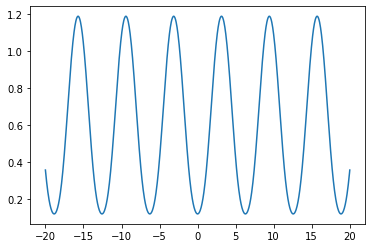

In [8]:
# 画下非线性波形
x_list = np.linspace(-20, 20, 1000)
phi_list = np.zeros(1000);
i = 0;
for x in x_list:
    phi = 0;
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * result[m + 10]
    phi_list[i] = phi
    i += 1
phi_real_list = [phi.real for phi in phi_list]
plt.plot(x_list, phi_real_list)

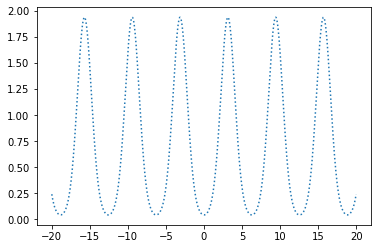

In [14]:
# 画下对应的线性带的波形
xx = linear_result[1][0]
x1_list = np.linspace(-20, 20, 1000)
phi1_list = np.zeros(1000);
i = 0;
for x in x1_list:
    phi = 0;
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * xx[m + 10]
    phi1_list[i] = phi
    i += 1
phi1_real_list = [phi.real for phi in phi1_list]
plt.plot(x1_list, phi1_real_list, ":")

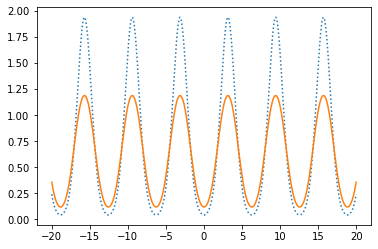

In [16]:
# 把线性带波形和非线性波形画在一起
plt.plot(x1_list, phi1_real_list, ":", x_list, phi_real_list, "-")

In [23]:
# 计算第二个能带的非线性波形
# 生成一个方程组
def fun2(f):
    F = np.zeros(21)
    for m in range(-10, 11):
        # L取10，k取0, v取1.5，mu取线性带第三个能带的值，0.98375806
        F[m + 10] = genEq(m, 10, 0, 1.5, linear_result[0][2], f)
    return F

# 解方程组, xx2是迭代的初始值，取的线性带第二个能带的a_m
xx2= linear_result[1][1]
result2 = fsolve(fun2, xx2)

print(result2)

[-2.08154911e-05  6.12686203e-05 -1.80358706e-04  5.29282588e-04
 -1.55683580e-03  4.64916630e-03 -1.33849433e-02  3.81212874e-02
 -1.54672301e-01  4.62382023e-01 -3.25790849e-13 -4.62382023e-01
  1.54672301e-01 -3.81212874e-02  1.33849433e-02 -4.64916630e-03
  1.55683580e-03 -5.29282588e-04  1.80358706e-04 -6.12686203e-05
  2.08154911e-05]


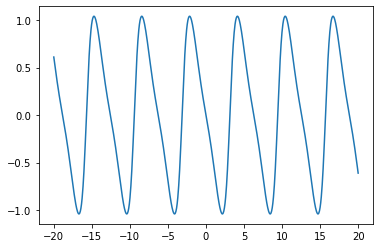

In [31]:
# 画下第二个能带的非线性波形
x2_list = np.linspace(-20, 20, 1000)
phi2_list = [1j for n in range(1000)]
i = 0;
for x in x2_list:
    phi = 0;
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * result2[m + 10]
    phi2_list[i] = phi
    i += 1
phi2_imag_list = [phi.imag for phi in phi2_list]
plt.plot(x2_list, phi2_imag_list)

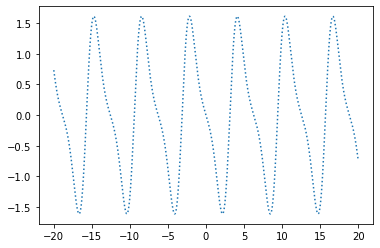

In [35]:
# 画下对应的线性带的波形
xx3 = linear_result[1][1]
x3_list = np.linspace(-20, 20, 1000)
phi3_list = [1j for n in range(1000)];
i = 0;
for x in x3_list:
    phi = 0;
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * xx3[m + 10]
    phi3_list[i] = phi
    i += 1
phi3_imag_list = [phi.imag for phi in phi3_list]
plt.plot(x3_list, phi3_imag_list, ":")

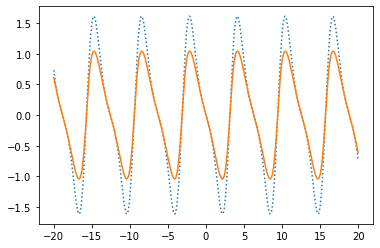

In [36]:
# 把线性带波形和非线性波形画在一起
plt.plot(x3_list, phi3_imag_list, ":", x2_list, phi2_imag_list, "-")